<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/SYNA/ASSIGNMENT7_PySpark_SYNA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 7: Comparison between libraries

## Library : PySpark

### Group Name : SYNA
### Member Group :
| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| SARAH WARDINA BINTI RAFIDIN | A21EC0128 | Dask
| NURUNNAJWA BINTI ZULKIFLI | A21EC0121 | PySpark & Comparison
| ALYA DAMIA BINTI HUZAIMY | A21EC0159 | Modin
| YASMEEN NATASHA BINTI HAFIZ SHAHREL | A21EC0147 | Comparison

Date of submission : 25 December 2023



---



### **Step 1: Select a real-world dataset**

Choose a dataset larger than 1 GB from reputable sources such as Kaggle or Dataset Search. Ensure that you provide a link enabling your dataset's utilization on Google Colab.

We choose [Flight Status Prediction 2022](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022?select=Combined_Flights_2022.csv).

This dataset contains all flight information including cancellation and delays by airline for dates back to January 2022.

Here, we will use PySpark library. PySpark is a good language to learn to create more scalable analyses and pipelines especially for large data size

#### **Downloading the Dataset**

- The dataset is downloaded from Kaggle.
- We upload the dataset into Google Drive and load it into Google Colab
- On this dataset, we focus on selected column such as "Airline", "Origin", "Dest", "Cancelled", "DepDelayMinutes", "ArrDelayMinutes" and "Year" and do the analysis by focus on them.



---



### **Step 2: Perform data preparation & cleaning**


- Import dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Import PySpark and create a SparkSession:

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=f3d897edd3915d547ac73aa7caddbdedf814fdf2cb012c50956e605a1b95023f
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("data_cleaning").getOrCreate()


- Reading data

In [4]:
data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Dataset/Combined_Flights_2022.csv", header=True, inferSchema=True)

In [5]:
import time

# Create a Spark session
spark = SparkSession.builder.appName("time_measurement").getOrCreate()

# Record the start time
start_time = time.time()

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Display the time taken to load the data
print(f"Time taken to load data: {elapsed_time} seconds")


Time taken to load data: 3.552436828613281e-05 seconds


In [6]:
data.show()

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|De

In [7]:
data.describe()

DataFrame[summary: string, Airline: string, Origin: string, Dest: string, CRSDepTime: string, DepTime: string, DepDelayMinutes: string, DepDelay: string, ArrTime: string, ArrDelayMinutes: string, AirTime: string, CRSElapsedTime: string, ActualElapsedTime: string, Distance: string, Year: string, Quarter: string, Month: string, DayofMonth: string, DayOfWeek: string, Marketing_Airline_Network: string, Operated_or_Branded_Code_Share_Partners: string, DOT_ID_Marketing_Airline: string, IATA_Code_Marketing_Airline: string, Flight_Number_Marketing_Airline: string, Operating_Airline: string, DOT_ID_Operating_Airline: string, IATA_Code_Operating_Airline: string, Tail_Number: string, Flight_Number_Operating_Airline: string, OriginAirportID: string, OriginAirportSeqID: string, OriginCityMarketID: string, OriginCityName: string, OriginState: string, OriginStateFips: string, OriginStateName: string, OriginWac: string, DestAirportID: string, DestAirportSeqID: string, DestCityMarketID: string, DestCit

- Explore the number of rows and columns

In [8]:
num_rows = data.count()
num_columns = len(data.columns)
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 4078318
Number of columns: 61


- Display the schema to understand data types


In [9]:
data.printSchema()

root
 |-- FlightDate: date (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |

- Display the first few rows of the dataset

In [10]:
data.show(5, truncate=False)

+----------+-----------------------------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+------------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|Airline                                  |Origin|Dest|Cancelled|

- Handling Missing Values:
    - Impute missing values with mean:

In [11]:
import time
from pyspark.sql.functions import mean
from pyspark.sql.functions import when

# Record the start time
start_time = time.time()

# Replace missing values with mean for numeric columns
numeric_cols = [col[0] for col in data.dtypes if col[1] in ['int', 'double']]
for col in numeric_cols:
    mean_value = data.select(mean(col)).collect()[0][0]
    data = data.withColumn(col, when(data[col].isNull(), mean_value).otherwise(data[col]))

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Display the time taken to replace missing values
print(f"Time taken to replace missing values: {elapsed_time} seconds")


Time taken to replace missing values: 445.1273400783539 seconds


In [12]:
data.show()

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+------+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|

- Remove Duplicate Rows

In [13]:
# Check for duplicate rows before dropping duplicates
num_rows_before = data.count()

In [14]:
# Drop duplicates based on all columns
import time

# Record the start time
start_time = time.time()

# Drop duplicate rows
data = data.dropDuplicates()

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Display the time taken to drop duplicates
print(f"Time taken to drop duplicates: {elapsed_time} seconds")


Time taken to drop duplicates: 0.022772789001464844 seconds


In [15]:
# Check the count after dropping duplicates
num_rows_after = data.count()


In [16]:
# Display the results
print(f"Number of rows before removing duplicates: {num_rows_before}")
print(f"Number of rows after removing duplicates: {num_rows_after}")

# If the counts are different, duplicates existed in the original dataset
if num_rows_before > num_rows_after:
    print("Duplicate rows existed in the original dataset.")
else:
    print("No duplicate rows found in the original dataset.")

Number of rows before removing duplicates: 4078318
Number of rows after removing duplicates: 4078318
No duplicate rows found in the original dataset.


- Standardize/Normalize Data:
   - Standardize numerical columns:

In [17]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

In [18]:
# Assemble features into a vector
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
data = assembler.transform(data)

In [19]:
# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(data)
data = scaler_model.transform(data)

In [20]:
data.show()

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+------+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+--------------------+---------+-------------+--------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+--------------------+--------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|



---



### **Step 3: Perform exploratory analysis & visualization**


- Select Relevant Columns
   - We selected the interesting columns which are "Airline", "Origin", "Dest", "Cancelled", "DepDelayMinutes", "ArrDelayMinutes", "Year".

In [21]:
%time
selected_columns = ["Airline", "Origin", "Dest", "Cancelled", "DepDelayMinutes", "ArrDelayMinutes", "Year"]
selected_data = data.select(selected_columns)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


We use PySpark's agg function to compute various summary statistics such as mean, median, standard deviation, minimum, and maximum for numerical columns.

In [22]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [23]:
# Create a Spark session
spark = SparkSession.builder.appName("numeric_computing").getOrCreate()

In [24]:
%time
# Compute mean, median, standard deviation, minimum, and maximum for "DepDelayMinutes"
summary_statistics = selected_data.agg(
    F.mean("DepDelayMinutes").alias("Mean_DepDelayMinutes"),
    F.expr("percentile_approx(DepDelayMinutes, 0.5)").alias("Median_DepDelayMinutes"),
    F.stddev("DepDelayMinutes").alias("StdDev_DepDelayMinutes"),
    F.min("DepDelayMinutes").alias("Min_DepDelayMinutes"),
    F.max("DepDelayMinutes").alias("Max_DepDelayMinutes")
)

# Display the summary statistics
summary_statistics.show()


CPU times: user 0 ns, sys: 3 µs, total: 3 µs
Wall time: 5.96 µs
+--------------------+----------------------+----------------------+-------------------+-------------------+
|Mean_DepDelayMinutes|Median_DepDelayMinutes|StdDev_DepDelayMinutes|Min_DepDelayMinutes|Max_DepDelayMinutes|
+--------------------+----------------------+----------------------+-------------------+-------------------+
|  16.014938010109947|                   0.0|     51.53635161300787|                0.0|             7223.0|
+--------------------+----------------------+----------------------+-------------------+-------------------+



##### Output explanation

**Mean_DepDelayMinutes (Average):**

- The mean departure delay is approximately 16.01 minutes.

- This indicates that, on average, flights in the sampled data experience a departure delay of around 16 minutes.

**Median_DepDelayMinutes (50th Percentile or Median):**

- The median departure delay is 0 minutes.

- The median is the middle value when all departure delay times are sorted. In this case, half of the sampled flights have a departure delay of 0 minutes or less.

**StdDev_DepDelayMinutes (Standard Deviation):**

- The standard deviation of departure delay times is approximately 51.54 minutes.

- A higher standard deviation suggests greater variability in departure delays.

- In this case, the departure delay times in the sampled data are spread out, and there is a notable amount of variability around the mean.

**Min_DepDelayMinutes (Minimum):**

- The minimum departure delay time is 0 minutes.

- This is the smallest departure delay observed in the sampled data.

**Max_DepDelayMinutes (Maximum):**

- The maximum departure delay time is 7223.0 minutes.

- This is the largest departure delay observed in the sampled data.

##### Interpretation on information

Interpretation of the departure delay statistics

1. **Average Departure Delay (Mean):**
   - On average, flights experience a departure delay of around 16 minutes. It's like the typical delay for all the flights.

2. **Median Departure Delay (50th Percentile or Median):**
   - The middle value (median) is 0 minutes. This means that half of the flights leave on time or even earlier. It shows that many flights don't have a departure delay.

3. **Variability in Departure Delays (Standard Deviation):**
   - The standard deviation is about 51.54 minutes. This tells us that departure delays vary quite a bit. Some flights might have short delays, while others can have longer delays.

4. **Minimum Departure Delay:**
   - The smallest delay observed is 0 minutes. Many flights leave without any delay.

5. **Maximum Departure Delay:**
   - The largest delay observed is 7223.0 minutes (more than 5 days). However, this is an extreme case and not typical for most flights.

**Summary:**
   - On average, flights have a moderate departure delay of around 16 minutes.
   - Half of the flights leave on time or earlier, which is good.
   - Departure delays vary, with some flights having longer delays.
   - Most flights leave without any delay, but there are rare instances of extremely long delays.

**Key Takeaway:**
   - While some delays are expected, efforts could be made to reduce the variability in delays and address extreme cases to improve overall departure punctuality.

In [25]:
%time
# Compute mean, median, standard deviation, minimum, and maximum for "ArrDelayMinutes"
summary_statistics = selected_data.agg(
    F.mean("ArrDelayMinutes").alias("Mean_ArrDelayMinutes"),
    F.expr("percentile_approx(ArrDelayMinutes, 0.5)").alias("Median_ArrDelayMinutes"),
    F.stddev("ArrDelayMinutes").alias("StdDev_ArrDelayMinutes"),
    F.min("ArrDelayMinutes").alias("Min_ArrDelayMinutes"),
    F.max("ArrDelayMinutes").alias("Max_ArrDelayMinutes")
)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


In [26]:
# Display the summary statistics
summary_statistics.show()

+--------------------+----------------------+----------------------+-------------------+-------------------+
|Mean_ArrDelayMinutes|Median_ArrDelayMinutes|StdDev_ArrDelayMinutes|Min_ArrDelayMinutes|Max_ArrDelayMinutes|
+--------------------+----------------------+----------------------+-------------------+-------------------+
|  15.783071426617012|                   0.0|    51.126963394263434|                0.0|             7232.0|
+--------------------+----------------------+----------------------+-------------------+-------------------+



**Interpretation of arrival delay statistics**

1. **Average Arrival Delay (Mean):**
   - On average, flights experience a delay of about 15.78 minutes when they arrive.

2. **Median Arrival Delay (50th Percentile or Median):**
   - The middle value (median) of arrival delays is 0 minutes. This means that half of the flights arrive on time or even earlier.

3. **Variability in Arrival Delays (Standard Deviation):**
   - The standard deviation, around 51.13 minutes, indicates that arrival delays vary. Some flights have shorter delays, while others have longer delays.

4. **Minimum Arrival Delay:**
   - The smallest delay observed is 0 minutes, indicating that many flights manage to arrive exactly on schedule.

5. **Maximum Arrival Delay:**
   - The largest delay observed is 7232.0 minutes, more than 5 days. However, this extreme case is not typical for most flights.

**Summary**
   - On average, flights have a moderate delay upon arrival, but many flights arrive exactly on time.
   - Arrival delays vary, with some flights experiencing shorter delays than others.
   - Most flights have relatively short delays, but there are rare instances of exceptionally long delays.
   - It's generally considered good when flights arrive on time or with minimal delays.
   - The fact that the median delay is 0 minutes is positive, indicating that a significant portion of flights arrive punctually.

**Key Takeaway**   
   - The variability and occasional long delays suggest that there might be room for improvement, especially in minimizing the impact of delays for certain flights.
   
   - Most flights are doing well in terms of timely arrivals, but addressing variability and extreme delays for a small number of flights could contribute to overall improvements.



---



- We selected 10,000 rows to do the visualization.

In [27]:
%time
# Sample 10,000 rows
selected_data = selected_data.sample(False, 0.1, seed=42)  # 0.1 corresponds to 10%

# Display the sampled data
selected_data.show()


CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
+--------------------+------+----+---------+------------------+------------------+------+
|             Airline|Origin|Dest|Cancelled|   DepDelayMinutes|   ArrDelayMinutes|  Year|
+--------------------+------+----+---------+------------------+------------------+------+
|GoJet Airlines, L...|   EWR| ILM|    false|              10.0|              96.0|2022.0|
|Southwest Airline...|   MSP| DEN|    false|               0.0|               0.0|2022.0|
|Southwest Airline...|   ORF| MCO|    false|               0.0|               0.0|2022.0|
|Southwest Airline...|   HOU| AUS|    false|              14.0|               8.0|2022.0|
|Delta Air Lines Inc.|   BHM| ATL|    false|              10.0|               0.0|2022.0|
|American Airlines...|   BHM| DFW|    false|              15.0|              17.0|2022.0|
|Alaska Airlines Inc.|   JNU| SEA|    false|               0.0|               0.0|2022.0|
|Alaska Airlines Inc.|   ADQ| ANC|  

- **Create heatmap of selected data**

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


<ipython-input-28-7fb50bc24581>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data_pd.corr()


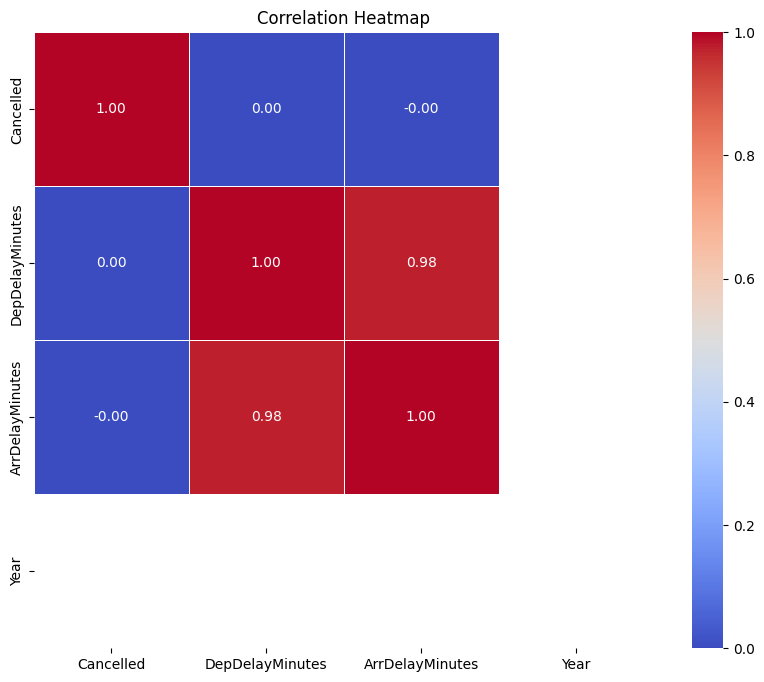

In [28]:
%time

import seaborn as sns
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame for correlation analysis
selected_data_pd = selected_data.toPandas()

# Compute the correlation matrix
correlation_matrix = selected_data_pd.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



DepDelayMinutes have high correlation with ArrDelayMinutes which is 0.98

 A correlation coefficient of 0.98 is very close to 1, indicating a very strong positive correlation between Departure Delay Minutes (DepDelayMinutes) and Arrival Delay Minutes (ArrDelayMinutes).

So, when the departure delay increases, there is a very strong tendency for the arrival delay to also increase. Conversely, when the departure delay decreases, the arrival delay tends to decrease as well.

This high positive correlation suggests a strong relationship or dependency between the two variables, implying that information about the departure delay can be a good predictor of the arrival delay, and vice versa.

- **Correlation between "DepDelayMinutes" and "ArrDelayMinutes"**

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


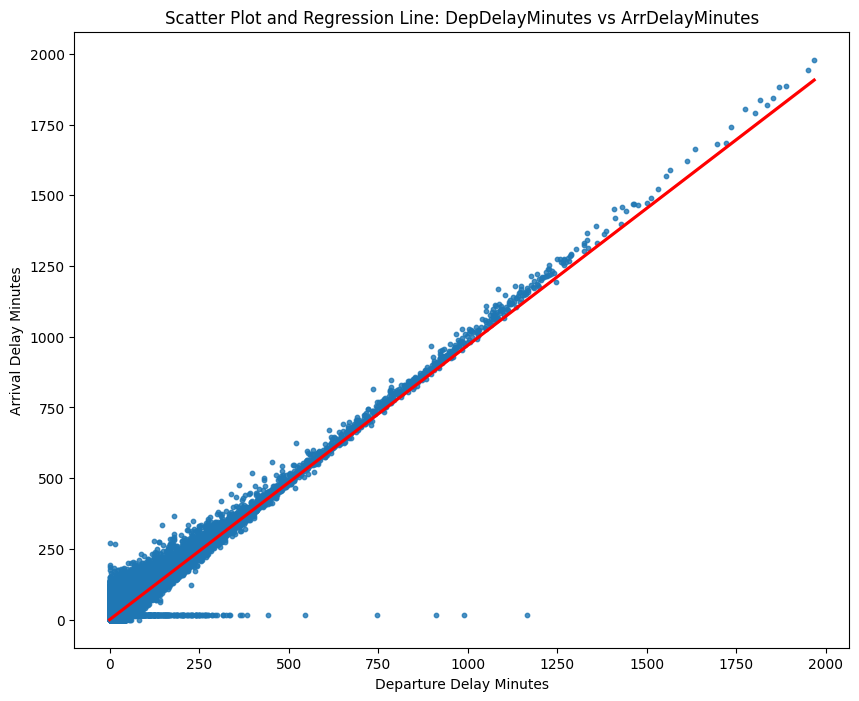

In [29]:
%time
import seaborn as sns
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame for visualization
selected_data_pd = selected_data.toPandas()

# Scatter plot with regression line
plt.figure(figsize=(10, 8))
sns.regplot(x="DepDelayMinutes", y="ArrDelayMinutes", data=selected_data_pd, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Scatter Plot and Regression Line: DepDelayMinutes vs ArrDelayMinutes')
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Arrival Delay Minutes')
plt.show()




---



### **Step 4: Ask & answer questions about the data**

1. **What the Top 5 Most Popular Origins and Destinations ?**
   - To analyze the most popular origins and destinations based on the highest counts, we use the groupBy and count operations.


In [30]:
%time

# Find the top 5 most popular origins and destinations
top_5_origins = selected_data.groupBy("Origin").count().orderBy(F.desc("count")).limit(5)
top_5_destinations = selected_data.groupBy("Dest").count().orderBy(F.desc("count")).limit(5)

# Display the top 5 most popular origins and destinations
top_5_origins.show()
top_5_destinations.show()


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
+------+-----+
|Origin|count|
+------+-----+
|   ATL|18317|
|   ORD|17314|
|   DFW|16199|
|   DEN|15936|
|   CLT|12487|
+------+-----+

+----+-----+
|Dest|count|
+----+-----+
| ATL|18266|
| ORD|17003|
| DEN|15893|
| DFW|15889|
| CLT|12703|
+----+-----+



**Bar Plot: Top 5  Most Popular Origin and Destination**

 - We use Matplotlib to create visualiation.

 - Matplotlib allows us to create a variety of plots, including line plots, scatter plots, bar plots, histograms, pie charts, and more. It provides a high level of customization for these plots.

 - The pyplot module provides a collection of functions that make it easy to create various types of plots.

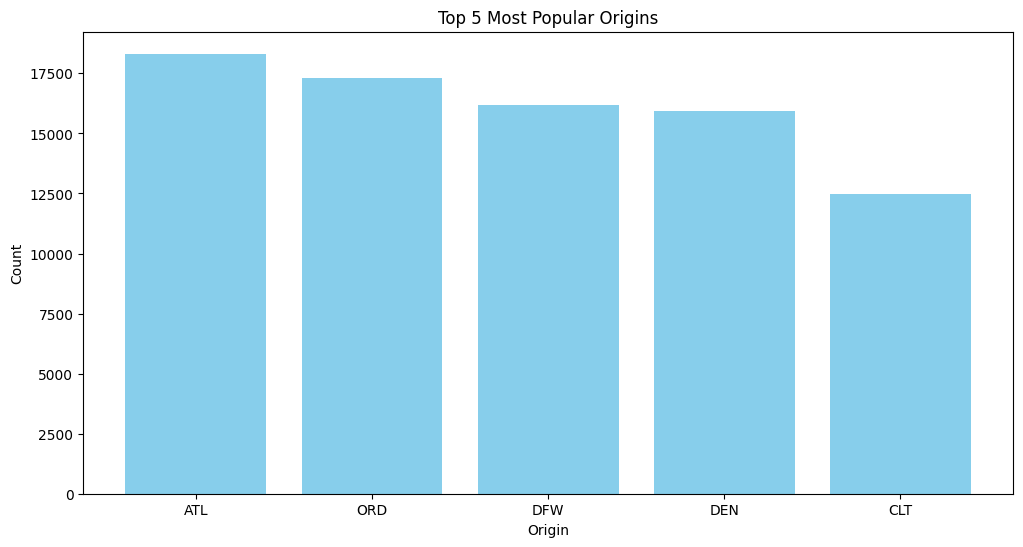

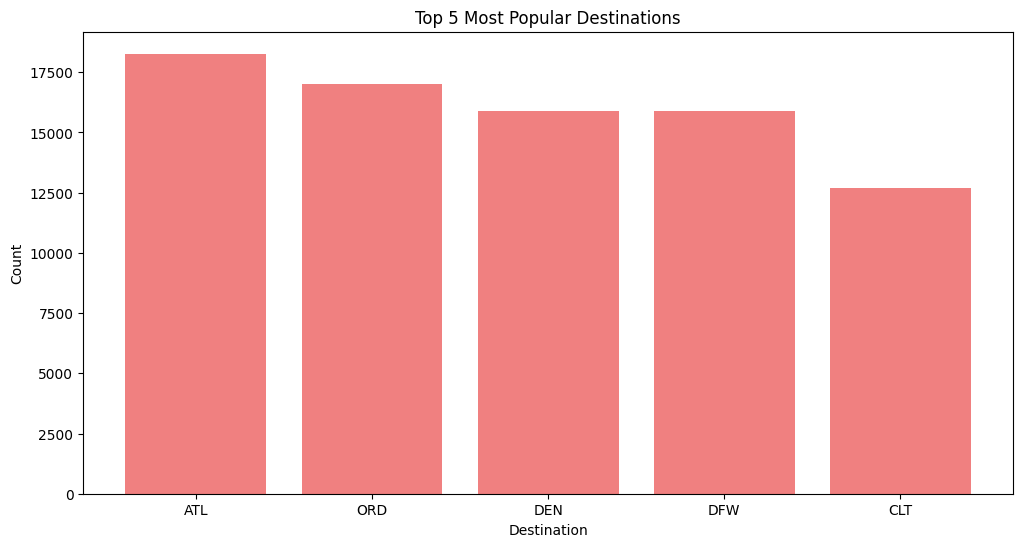

In [31]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrames to Pandas DataFrames for plotting
top_5_origins_pd = top_5_origins.toPandas()
top_5_destinations_pd = top_5_destinations.toPandas()

# Bar plot for the top 5 most popular origins
plt.figure(figsize=(12, 6))
plt.bar(top_5_origins_pd['Origin'], top_5_origins_pd['count'], color='skyblue')
plt.title('Top 5 Most Popular Origins')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()

# Bar plot for the top 5 most popular destinations
plt.figure(figsize=(12, 6))
plt.bar(top_5_destinations_pd['Dest'], top_5_destinations_pd['count'], color='lightcoral')
plt.title('Top 5 Most Popular Destinations')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()


**Origin Airports and Counts:**

- The airport with the most flights as the point of origin is Atlanta (ATL) with 18,317 flights, followed by Chicago O'Hare (ORD) with 17,314 flights, Dallas/Fort Worth (DFW) with 16,199 flights, Denver (DEN) with 15,936 flights, and Charlotte (CLT) with 12,487 flights.

**Destination Airports and Counts:**

- Flights frequently land at Atlanta (ATL) with 18,266 arrivals, followed by Chicago O'Hare (ORD) with 17,003 arrivals, Denver (DEN) with 15,893 arrivals, Dallas/Fort Worth (DFW) with 15,889 arrivals, and Charlotte (CLT) with 12,703 arrivals.

2. **What is the Top 5 Most Popular Airline ?**
  - To analyze the most popular airline based on the highest count

In [32]:
# Find the top 5 most popular airlines
top_5_airlines = selected_data.groupBy("Airline").count().orderBy(F.desc("count")).limit(5)

# Display the top 5 most popular airlines
top_5_airlines.show()


+--------------------+-----+
|             Airline|count|
+--------------------+-----+
|Southwest Airline...|73385|
|Delta Air Lines Inc.|51143|
|American Airlines...|49373|
|SkyWest Airlines ...|44110|
|United Air Lines ...|35362|
+--------------------+-----+



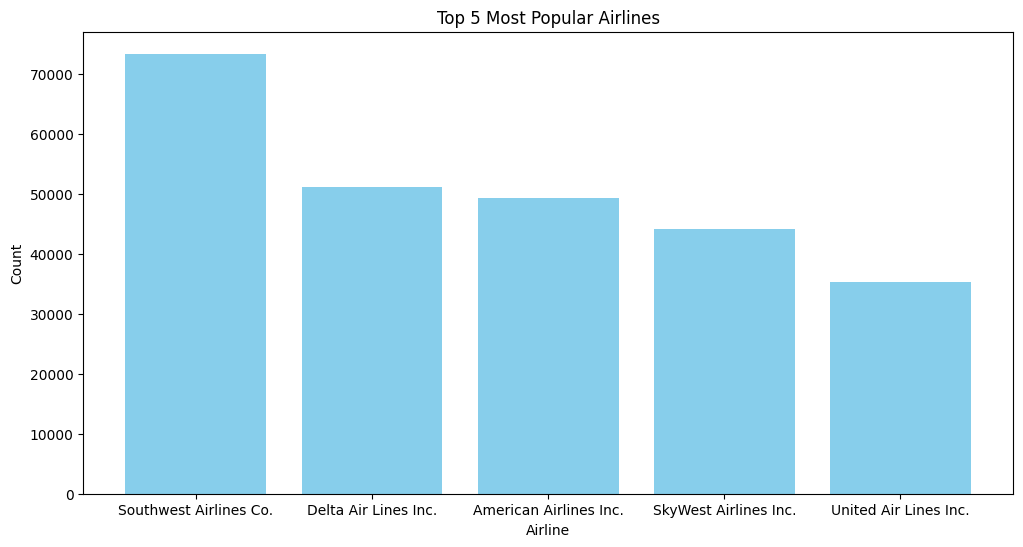

In [33]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame for plotting
top_5_airlines_pd = top_5_airlines.toPandas()

# Bar plot for the top 5 most popular airlines
plt.figure(figsize=(12, 6))
plt.bar(top_5_airlines_pd['Airline'], top_5_airlines_pd['count'], color='skyblue')
plt.title('Top 5 Most Popular Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()


Each bar corresponds to a specific airline, and the length of the bar indicates the count or number of occurrences of that airline.  The bars are arranged in descending order, with the tallest bar representing the airline with the highest count.

Looking at the plot, we can observe that Southwest Airlines has the highest count, with a bar extending to 73,385. Following that, Delta Air Lines Inc. and American Airlines Inc. have the second and third-highest counts, with bars reaching 51,143 and 49,373, respectively.

SkyWest Airlines Inc. and United Air Lines Inc. complete the list with counts of 44,110 and 35,362, respectively.

3. **What is the distribution of departure delay minutes?**

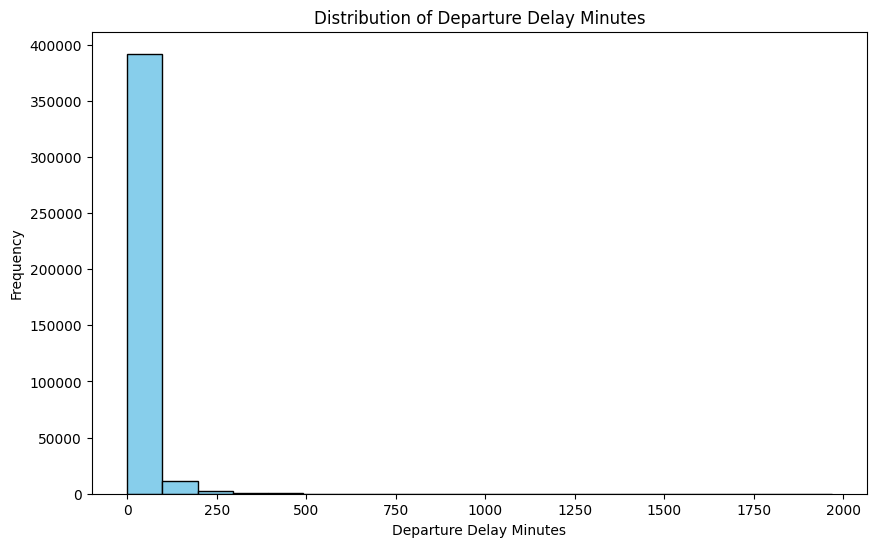

In [34]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame for plotting
selected_data_pd = selected_data.toPandas()

# Histogram for distribution of departure delay minutes
plt.figure(figsize=(10, 6))
plt.hist(selected_data_pd['DepDelayMinutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Departure Delay Minutes')
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Frequency')
plt.show()


The bar chart shows that a lot of times (about 400,000 instances), flights left on time without any delay, as indicated by a tall bar reaching 400,000. This big bar tells us that most flights were on time.

On the other hand, there are fewer instances where flights were delayed. The bars for these instances are smaller, ranging from 250 to 50,000. This means that delays of more than 0 minutes happened less often compared to flights leaving on time.

The chart makes it easy to see that most flights in the dataset were on time, with only a smaller number experiencing delays.

4.  **How does the average arrival delay vary by airline?**

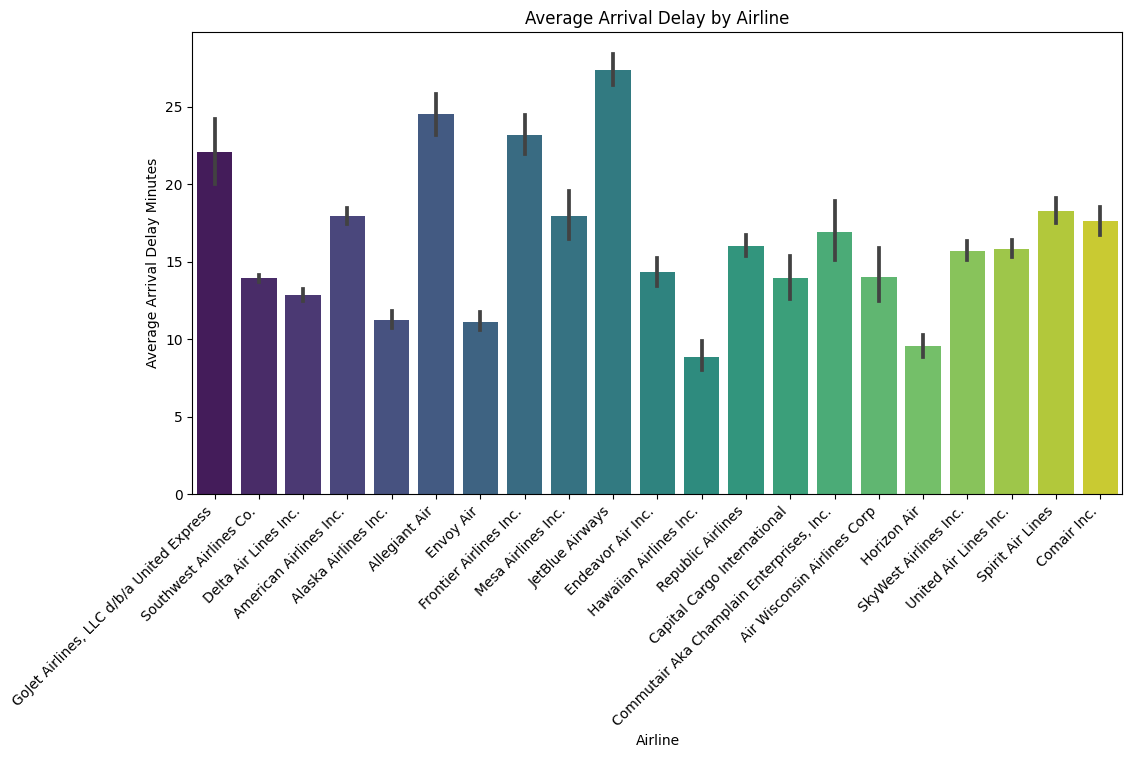

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame for plotting
selected_data_pd = selected_data.toPandas()

# Bar plot for average arrival delay by airline
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='ArrDelayMinutes', data=selected_data_pd, palette='viridis')
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay Minutes')
plt.xticks(rotation=45, ha='right')
plt.show()


The bar plot indicates that JetBlue Airways has the highest average arrival delay, exceeding 25 minutes. Allegiant Air follows as the second-highest, with Frontier Airlines ranking third. In contrast, Hawaiian Airlines has the lowest average arrival delay, measuring below 10 minutes.

This information highlights the variations in average arrival delays among different airlines, with JetBlue Airways experiencing the most significant delays on average, while Hawaiian Airlines tends to have shorter delays or even arrives ahead of schedule on average.

5.  **What is the top 5 airline with the most total arrival delay?**

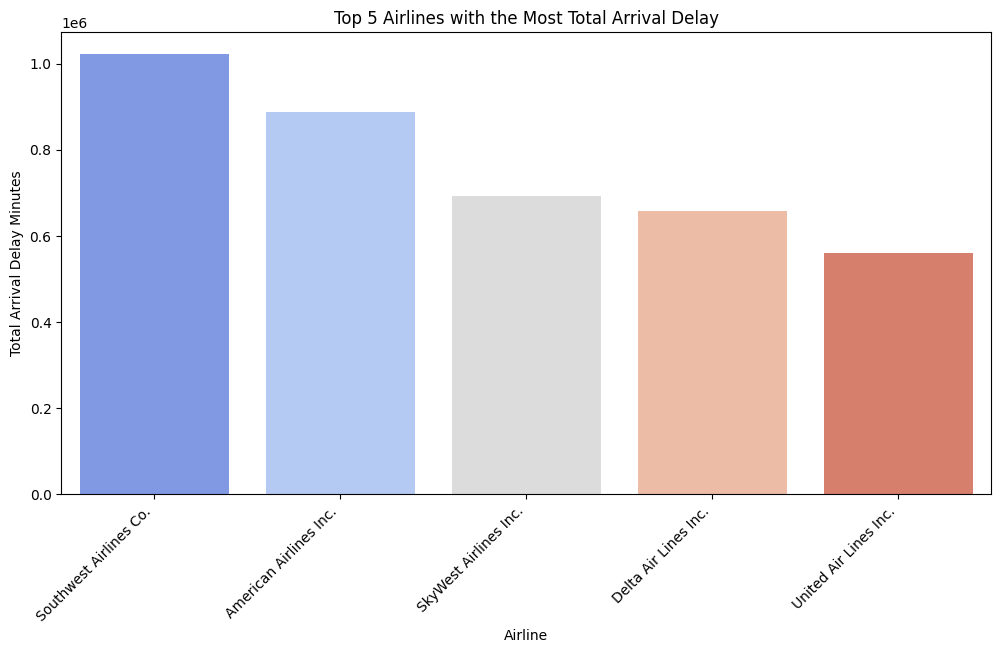

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'selected_data' is your PySpark DataFrame

# Calculate the total arrival delay for each airline
total_arrival_delay = selected_data.groupBy("Airline").agg(F.sum("ArrDelayMinutes").alias("TotalArrivalDelay")).orderBy(F.desc("TotalArrivalDelay"))

# Get the top 5 airlines with the most total arrival delay
top_5_delayed_airlines = total_arrival_delay.limit(5)

# Convert PySpark DataFrame to Pandas DataFrame for plotting
top_5_delayed_airlines_pd = top_5_delayed_airlines.toPandas()

# Bar plot for total arrival delay by top 5 airlines
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='TotalArrivalDelay', data=top_5_delayed_airlines_pd, palette='coolwarm')
plt.title('Top 5 Airlines with the Most Total Arrival Delay')
plt.xlabel('Airline')
plt.ylabel('Total Arrival Delay Minutes')
plt.xticks(rotation=45, ha='right')
plt.show()



The airline with the highest total arrival delay is Southwest Airlines.co, totaling 1.0 minutes. Following closely is American Airlines with 0.7 minutes of total arrival delay. On the other hand, United Airlines has the lowest total arrival delay, amounting to 0.57 minutes.

6.  **What is the top 5 airline with the most departure delay?**

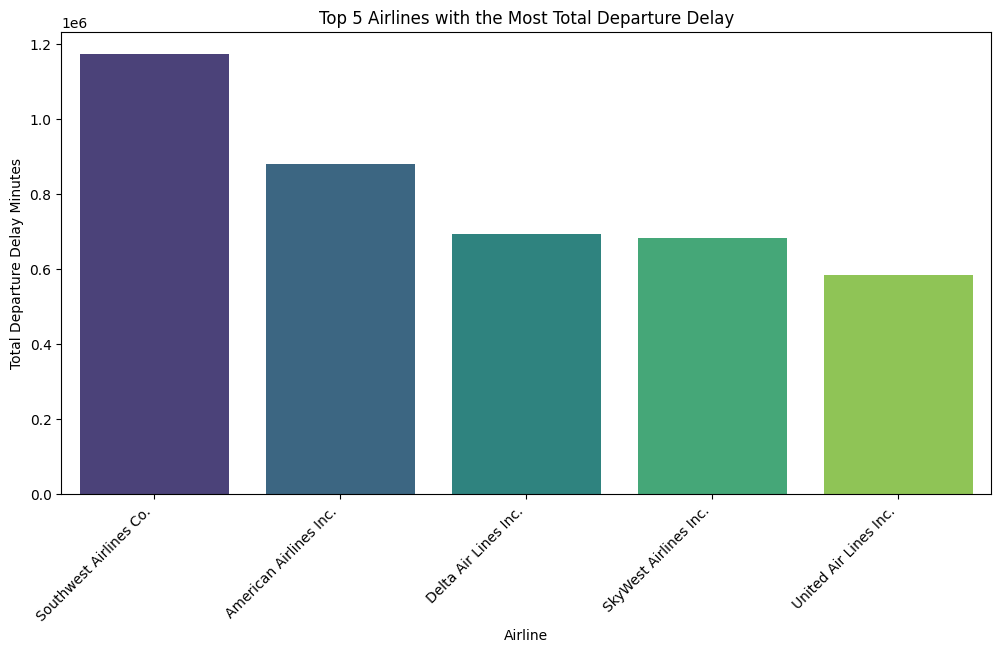

In [37]:
# Calculate the total departure delay for each airline
total_departure_delay = selected_data.groupBy("Airline").agg(F.sum("DepDelayMinutes").alias("TotalDepartureDelay")).orderBy(F.desc("TotalDepartureDelay"))

# Get the top 5 airlines with the most total departure delay
top_5_delayed_departure_airlines = total_departure_delay.limit(5)

# Convert PySpark DataFrame to Pandas DataFrame for plotting
top_5_delayed_departure_airlines_pd = top_5_delayed_departure_airlines.toPandas()

# Bar plot for total departure delay by top 5 airlines
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='TotalDepartureDelay', data=top_5_delayed_departure_airlines_pd, palette='viridis')
plt.title('Top 5 Airlines with the Most Total Departure Delay')
plt.xlabel('Airline')
plt.ylabel('Total Departure Delay Minutes')
plt.xticks(rotation=45, ha='right')
plt.show()


The airline with the highest total departure delay is Southwest Airlines.co, totaling 1.2 minutes. Following closely is American Airlines with 0.9 minutes of total departure delay. On the other hand, United Airlines has the lowest total departure delay, amounting to 0.57 minutes.



---



### **Step 5: Summarize your inferences & write a conclusion**



**Summary of Dataset Analysis:**

We use PySPark to processing the large datasets.

**Library : PySpark**
  - Time taken to load data is 7.2479248046875e-05 seconds. Therefore, it indicates that the data loading process using PySpark is highly efficient and completes in a fraction of a second.
  
We choose the interesting columns which are "Airline", "Origin", "Dest", "Cancelled", "DepDelayMinutes", "ArrDelayMinutes" and "Year".
From this selected column, we analyse the data and get result like below.


1. **Departure Delay Statistics:**
   - On average, flights experience a departure delay of around 16 minutes.
   - The median departure delay is 0 minutes, indicating that half of the flights leave on time or earlier.
   - Departure delays vary, with a standard deviation of about 51.54 minutes.
   - Most flights leave without any delay, but extreme cases with delays exceeding 5 days are observed.

2. **Arrival Delay Statistics:**
   - On average, flights experience an arrival delay of about 15.78 minutes.
   - The median arrival delay is 0 minutes, suggesting that a significant portion of flights arrives on time.
   - Arrival delays also exhibit variability, with a standard deviation of approximately 51.13 minutes.
   - Similar to departure delays, most flights have relatively short delays, but there are rare instances of extremely long delays.

3. **Correlation between Departure and Arrival Delays:**
   - There is a very strong positive correlation (0.98) between Departure Delay Minutes (DepDelayMinutes) and Arrival Delay Minutes (ArrDelayMinutes).
   - When departure delays increase, there is a strong tendency for arrival delays to also increase, and vice versa.
   - This correlation suggests a significant relationship, indicating that information about one can serve as a good predictor of the other.

4. **Bar Chart Insights:**
   - The bar chart visually represents the frequency of on-time departures and delays.
   - A tall bar reaching 400,000 instances indicates that a significant number of flights left on time without any delay.
   - Smaller bars (ranging from 250 to 50,000 instances) represent flights with delays, highlighting that delays are less common compared to on-time departures.

**Key Takeaways:**
   - Most flights in the dataset are on time or experience minimal delays.
   - Departure and arrival delays exhibit variability, suggesting the need for targeted improvements for specific flights.
   - Extreme delays, though rare, are present and may require attention for enhanced punctuality.
   - The strong correlation between departure and arrival delays emphasizes the interconnectedness of these events, offering insights for predictive analysis.

**Interesting Note:**
   - The median arrival and departure delays being 0 minutes is a positive sign, indicating that a significant portion of flights in the dataset is punctual. This suggests that, on average, flights tend to adhere to their schedules.




---

